# 3rd problem

## Q1

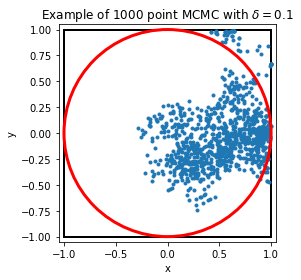

For 1000 points:
Acceptance ratio:
0.957
Estimate of pi:
3.684


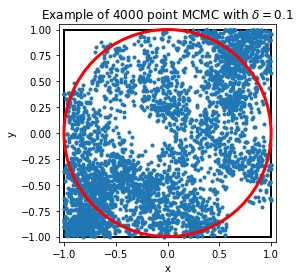

For 4000 points:
Acceptance ratio:
0.94325
Estimate of pi:
2.887


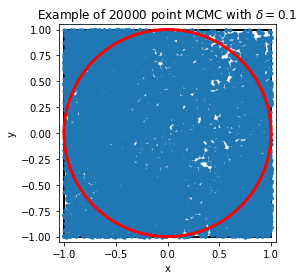

For 20000 points:
Acceptance ratio:
0.94235
Estimate of pi:
2.9382


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

N = [1e3, 4e3, 20e3]

stepsize = 0.1

for n in N:
    n = int(n)
    
    S = np.zeros(n)
    xx = np.zeros(n)
    yy = np.zeros(n)    
    rejected = 0
    x, y = 0, 0
    
    for i in range(n):        
        dx = np.random.uniform(-stepsize,stepsize)
        dy = np.random.uniform(-stepsize,stepsize)
        x = x + dx
        y = y + dy
        
        if (x**2 + y**2) < 1:
            S[i] = 4
        if abs(x) > 1 or abs(y) > 1:
            x = x - dx
            y = y - dy
            rejected += 1
        xx[i] = x
        yy[i] = y
        
    plt.figure()
    ax = plt.gca()
    circle = plt.Circle((0,0), 1, color="red", fill=False, zorder=5, lw=3)
    
    plt.plot(xx,yy, '.')
    plt.title("Example of " + str(n) + " point MCMC with " + r'$\delta = $' + str(stepsize))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim([-1.05, 1.05])
    plt.ylim([-1.05, 1.05])
    
    ax.add_artist(circle)
    ax.add_patch(Rectangle((-1,-1), 2, 2, lw=2, color="black", fill=False))
    plt.axes().set_aspect('equal')
    plt.show()
    plt.close("all")
    
    print(f"For {n} points:")
    print("Acceptance ratio:")
    print(1-rejected/n)
    print("Estimate of pi:")
    print(np.mean(S))

In the plots above we can observe that 1000 or 4000 points are definitely not enough to sample the square uniformly.

## Q2

Now we try using a different stepsize $\delta$ that rejects about the half of the points.

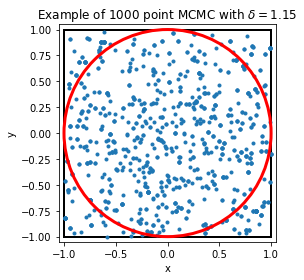

For 1000 points:
Acceptance ratio:
0.515
Estimate of pi:
3.168


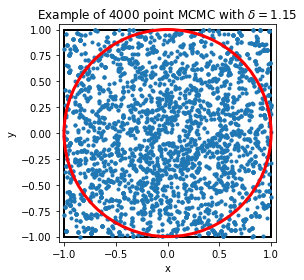

For 4000 points:
Acceptance ratio:
0.50725
Estimate of pi:
3.179


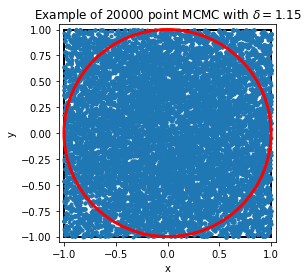

For 20000 points:
Acceptance ratio:
0.5107999999999999
Estimate of pi:
3.1338


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

N = [1e3, 4e3, 20e3]

stepsize = 1.15

for n in N:
    n = int(n)
    
    S = np.zeros(n)
    xx = np.zeros(n)
    yy = np.zeros(n)    
    rejected = 0
    x, y = 0, 0
    
    for i in range(n):        
        dx = np.random.uniform(-stepsize,stepsize)
        dy = np.random.uniform(-stepsize,stepsize)
        x = x + dx
        y = y + dy
        
        if abs(x) > 1 or abs(y) > 1:
            x = x - dx
            y = y - dy
            rejected += 1
        if (x**2 + y**2) < 1:
            S[i] = 4
        xx[i] = x
        yy[i] = y
        
    plt.figure()
    ax = plt.gca()
    circle = plt.Circle((0,0), 1, color="red", fill=False, zorder=5, lw=3)
    
    plt.plot(xx,yy, '.')
    plt.title("Example of " + str(n) + " point MCMC with " + r'$\delta = $' + str(stepsize))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim([-1.05, 1.05])
    plt.ylim([-1.05, 1.05])
    
    ax.add_artist(circle)
    ax.add_patch(Rectangle((-1,-1), 2, 2, lw=2, color="black", fill=False))
    plt.axes().set_aspect('equal')
    plt.show()
    plt.close("all")
    
    print(f"For {n} points:")
    print("Acceptance ratio:")
    print(1-rejected/n)
    print("Estimate of pi:")
    print(np.mean(S))

Now the square seems to be sampled uniformly even with 1000 points. Though that does not necessarily mean better estimates of $\pi$.

## 3

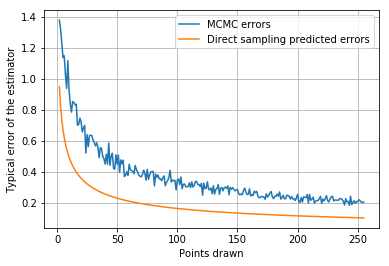

In [5]:
import numpy as np
import matplotlib.pyplot as plt

N = 256

stepsize = 1.1
runs = 100

pi_estimates = []
num_error = []
pred_error = []

for n in range(1, N+1):
    n = int(n)
    pi_estimate = [] # holds pi # of runs estimates of pi for n points drawn
    
    for run in range(runs):
        S = np.zeros(n)
        x, y = 0, 0

        for i in range(n):        
            dx = np.random.uniform(-stepsize,stepsize)
            dy = np.random.uniform(-stepsize,stepsize)
            x = x + dx
            y = y + dy

            if abs(x) > 1 or abs(y) > 1:
                x = x - dx
                y = y - dy
            if (x**2 + y**2) < 1:
                S[i] = 4
        pi_estimate.append(np.mean(S))
        
    pi_estimates.append(np.mean(pi_estimate))
    num_error.append(np.sqrt(np.var(pi_estimate)))
    pred_error.append(np.sqrt(np.pi * (4 - np.pi) / n))
    
plt.figure()
shift = 2 # shift by 2 to conserve a reasonable scale in the plot
plt.plot(range(shift, N), num_error[shift:], label="MCMC errors")
plt.plot(range(shift, N), pred_error[shift:], label="Direct sampling predicted errors")
plt.legend()
plt.xlabel("Points drawn")
plt.ylabel("Typical error of the estimator")
plt.grid()
plt.show()
plt.close("all")

The MCMC error does not decay as fast as the direct sampling one. That may be explained with the correlations of data.
By definition \begin{equation}
Var(\frac{1}{n}\Sigma x_i) = \frac{1}{n^2}\Sigma_i x_i^2 + \frac{1}{n^2}\Sigma_{i\neq j} x_i x_j - \bar x^2
\end{equation}
Here the second term expresses the covariance between data points. Since here we expect positive covariance, as successive points are drawn more or less from the same region, the total error converges slower.

## Q4 & Q5

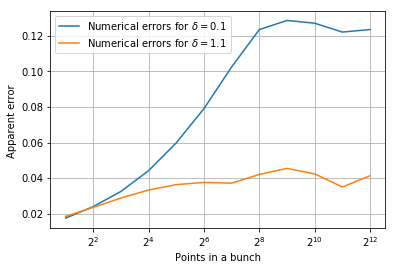

In [136]:
import numpy as np
import matplotlib.pyplot as plt

iters = 13
n = 2**iters
stepsizes = [0.1, 1.1]

fig, ax = plt.subplots()

for stepsize in stepsizes:
    total_varss = np.zeros(iters)
    S = np.zeros(n)
    x, y = 0, 0

    for i in range(n):        
        dx = np.random.uniform(-stepsize,stepsize)
        dy = np.random.uniform(-stepsize,stepsize)
        x = x + dx
        y = y + dy

        if abs(x) > 1 or abs(y) > 1:
            x = x - dx
            y = y - dy
        if (x**2 + y**2) < 1:
            S[i] = 4

    def bunching(input):
        size = len(input)
        total = 0
        squares = 0
        output = []
        for i in range(int(size/2)):
            bunched = input[2*i] + input[2*i+1]
            total += bunched
            squares += input[2*i]**2 + input[2*i+1]**2
            output.append(bunched/2)
        mean = total / size
        error = np.sqrt(squares/size - mean**2) / np.sqrt(size)

        return mean, error, output

    errors = []
    means = []

    for i in range(iters-1):
        temp_mean, temp_error, bunched = bunching(S)
        means.append(temp_mean)
        errors.append(temp_error)
        S = bunched[:]
    
    ax.set_xscale('log', basex=2)

    xx = [ 2**i for i in range(1, iters)]
    plt.plot(xx, errors, '-', label="Numerical errors for " + r'$\delta = $' + str(stepsize))
    plt.legend()
    plt.xlabel("Points in a bunch")
    plt.ylabel("Apparent error ")
plt.grid()
plt.show()
plt.close("all")

Bunching of data points allows one to dilute the impact of the initial conditions - since all chains begin from the origin there exists a slight bias.

The plateau appears when the bunched data becomes uncorrelated, as the expected variance of independent bunched data points does not change upon bunching them.


When there just a few bunches left the error becomes noisy.